<a href="https://colab.research.google.com/github/SuperChini/Brief-sample/blob/main/Modelo_Predictivo_de_Renuncia_Accenture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [146]:
from google.colab import files 
uploaded = files.upload()

Saving train log Accenture @.xlsx to train log Accenture @ (2).xlsx


In [147]:
column_names = ['ID','nivel_de_satisfaccion','ultima_evalucacion','cantidad_proyectos','cantidad_horas_mensuales_trabajadas','años_en_la_empresa', 'tuvo_un_accidente_laboral', 'promociones_ultimos_5_anios', 'area', 'areaNum', 'salario', 'salario#', 'se_fue', 'se_fue#']

raw_dataset = pd.read_excel('train log Accenture @ (2).xlsx')    

dataset = raw_dataset.copy()
dataset

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,areaNum,salario,salario#,se_fue,se_fue#
0,2876,0.63,0.84,3,269,2,0,0,gestion de productos,1,bajo,1,no,0
1,7883,0.11,0.93,7,284,4,0,0,tecnica,2,bajo,1,si,1
2,4089,0.60,0.42,2,109,6,0,0,ventas,3,bajo,1,no,0
3,8828,0.38,0.49,4,196,3,0,1,direccion,4,alto,3,no,0
4,9401,0.11,0.83,6,244,4,0,0,contabilidad,5,bajo,1,si,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,8701,0.63,0.85,2,156,3,1,0,RRHH,8,medio,2,no,0
7996,501,0.62,0.85,3,237,3,1,0,IT,10,medio,2,no,0
7997,2834,0.86,1.00,5,257,5,0,0,tecnica,2,medio,2,si,1
7998,8245,0.88,0.51,3,208,3,0,0,RRHH,8,medio,2,no,0


In [148]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   8000 non-null   int64  
 1   nivel_de_satisfaccion                8000 non-null   float64
 2   ultima_evaluacion                    8000 non-null   float64
 3   cantidad_proyectos                   8000 non-null   int64  
 4   promedio_horas_mensuales_trabajadas  8000 non-null   int64  
 5   años_en_la_empresa                   8000 non-null   int64  
 6   tuvo_un_accidente_laboral            8000 non-null   int64  
 7   promociones_ultimos_5_anios          8000 non-null   int64  
 8   area                                 8000 non-null   object 
 9   areaNum                              8000 non-null   int64  
 10  salario                              8000 non-null   object 
 11  salario#                      

In [149]:
dataset.isna().sum().sort_values()

ID                                     0
nivel_de_satisfaccion                  0
ultima_evaluacion                      0
cantidad_proyectos                     0
promedio_horas_mensuales_trabajadas    0
años_en_la_empresa                     0
tuvo_un_accidente_laboral              0
promociones_ultimos_5_anios            0
area                                   0
areaNum                                0
salario                                0
salario#                               0
se_fue                                 0
se_fue#                                0
dtype: int64

In [150]:
dataset.groupby(by ='area').size() 

area
I+D                      431
IT                       642
RRHH                     399
contabilidad             395
direccion                325
gestion de productos     492
marketing                442
soporte                 1178
tecnica                 1489
ventas                  2207
dtype: int64

In [151]:
dataset.groupby(by ='se_fue').size() 

se_fue
no    6112
si    1888
dtype: int64

dataset.groupby(by ='area').size() 

In [152]:
dataset = pd.DataFrame(dataset)
dataset

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,areaNum,salario,salario#,se_fue,se_fue#
0,2876,0.63,0.84,3,269,2,0,0,gestion de productos,1,bajo,1,no,0
1,7883,0.11,0.93,7,284,4,0,0,tecnica,2,bajo,1,si,1
2,4089,0.60,0.42,2,109,6,0,0,ventas,3,bajo,1,no,0
3,8828,0.38,0.49,4,196,3,0,1,direccion,4,alto,3,no,0
4,9401,0.11,0.83,6,244,4,0,0,contabilidad,5,bajo,1,si,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,8701,0.63,0.85,2,156,3,1,0,RRHH,8,medio,2,no,0
7996,501,0.62,0.85,3,237,3,1,0,IT,10,medio,2,no,0
7997,2834,0.86,1.00,5,257,5,0,0,tecnica,2,medio,2,si,1
7998,8245,0.88,0.51,3,208,3,0,0,RRHH,8,medio,2,no,0


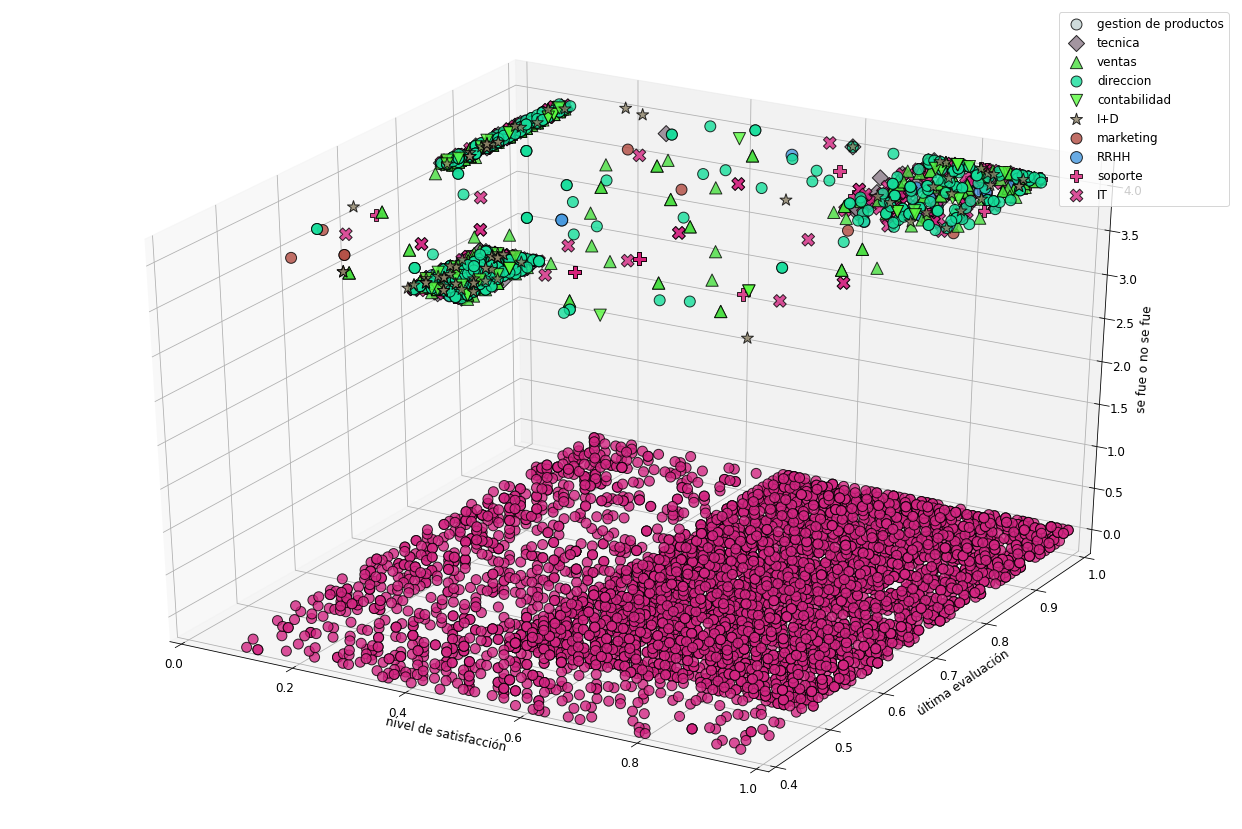

In [164]:
# Creating the figure
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (22, 15))
ax = plt.axes(projection ="3d")
plt.rc('font', size=12)
  
si = dataset.loc[dataset['se_fue#'] == 1]
no = dataset.loc[dataset['se_fue#'] == 0]

si = pd.DataFrame(si)
no = pd.DataFrame(no)

#print(pd.DataFrame(si))
#print(pd.DataFrame(no))

listColor = []
listArea = []
listMarkers = ['o', 'D', '^', 'o', 'v', '*', 'o', 'o','P', 'X']
listSizes = [120, 130, 150, 120, 150, 160, 120, 140, 160, 160]

for x in dataset['area']:
 if x not in listArea:
  listArea.append(x)
  #print(listArea)

for i in range(0,10):
   
    # Creating random colors
    import random
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
    listColor.append(color)

    plt.xlim(0, 1)
    plt.ylim(0.4 , 1)
    
    
    #for j in range(1, len(si)):
    x_si = si[si.areaNum == i]['nivel_de_satisfaccion']
    y_si = si[si.areaNum == i]['ultima_evaluacion']
    z_si = 4

   
    # Creating plot
    scatter = ax.scatter(x_si, y_si, z_si, c = color, edgecolor = 'black', marker = listMarkers[i], label = si['area'], s = listSizes[i], alpha = 0.8)
    ax.set_xlabel('nivel de satisfacción')
    ax.set_ylabel('última evaluación')
    ax.set_zlabel('se fue o no se fue')
    
    plt.legend(listArea)



for i in range(0,10):    
    
    #for k in range(1, len(no)):
    x_no = no[no.areaNum == i]['nivel_de_satisfaccion']
    y_no = no[no.areaNum == i]['ultima_evaluacion']
    z_no = 0
    
    #print(x_no, y_no, z_no)

    # Creating plot
    ax.scatter(x_no, y_no, z_no, c = color , edgecolor = 'black', marker = 'o', label = no['area'], s = 100, alpha =0.8)
    #ax.set_xlabel('X-axis')
    #ax.set_ylabel('Y-axis')
    #ax.set_zlabel('Z-axis')
    #plt.title(name)
    #print(si[si.areaNum == 1]['nivel_de_satisfaccion'])
    plt.legend(listArea)


plt.show()

Text(0.5, 0.98, 'Distribuciones con las demás variables')

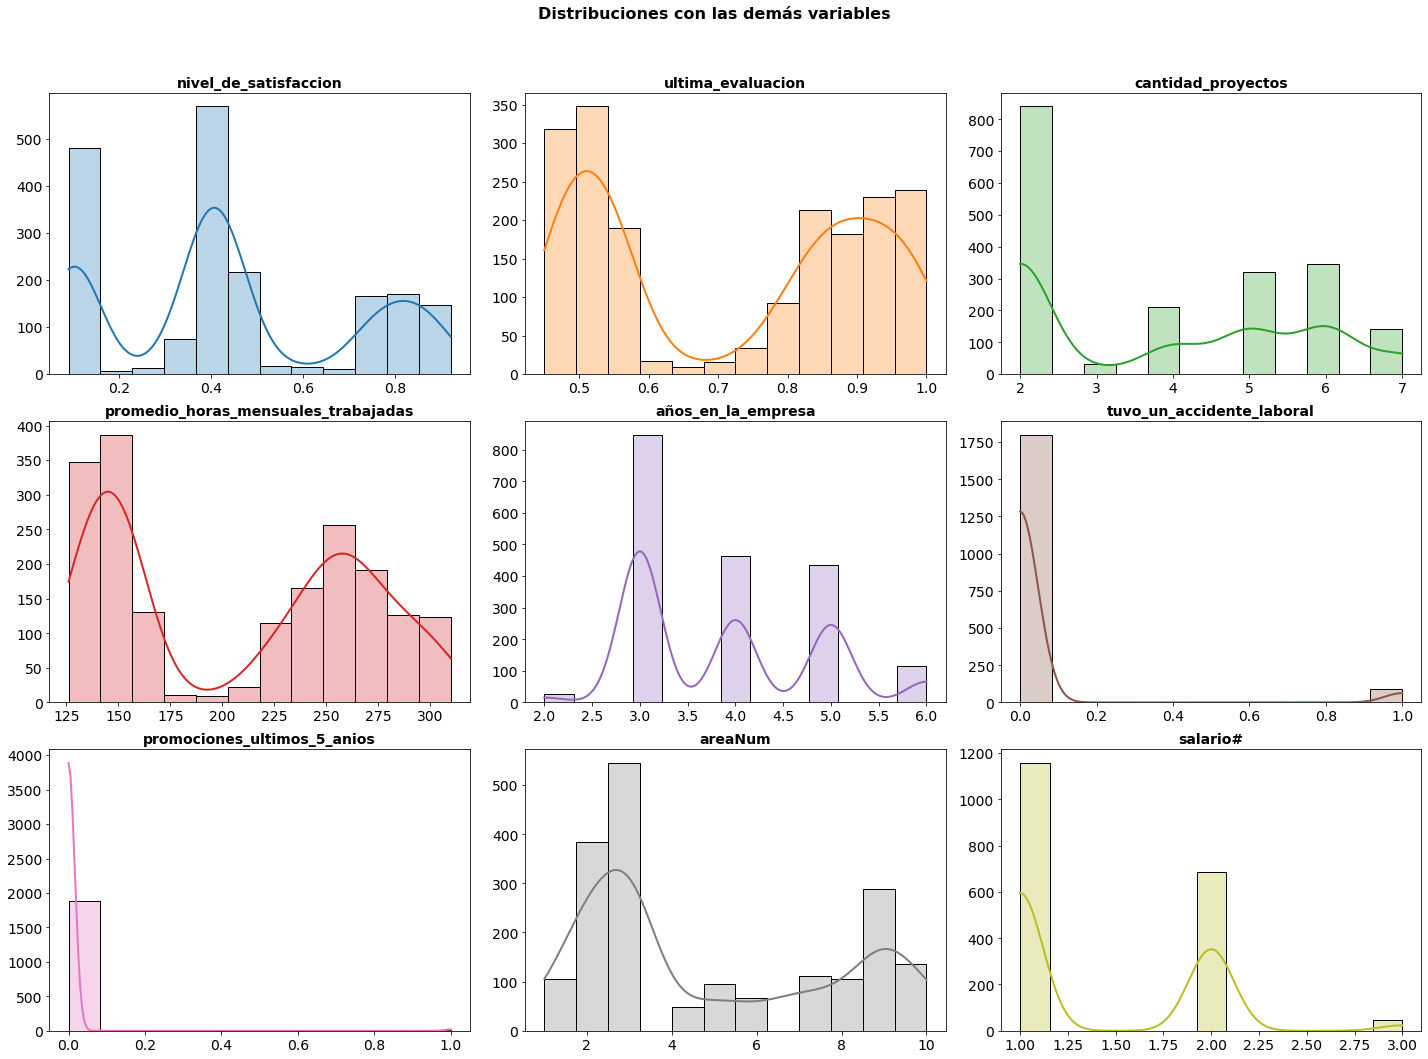

In [165]:
# Distribuciones de las variables a tener en cuenta
# ==============================================================================
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols = 3, figsize=(20, 15))
axes = axes.flat
si_numeric = si.select_dtypes(include=['float64', 'int64']).columns
si_numeric = si_numeric.drop('ID')
si_numeric = si_numeric.drop('se_fue#')

for i, colum in enumerate(si_numeric):
    
    sns.histplot(data = si, x = colum, stat = "count", kde = True, color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"], line_kws = {'linewidth': 2}, alpha = 0.3, ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribuciones con las demás variables', fontsize = 16, fontweight = "bold")

In [166]:
print(max(dataset['promedio_horas_mensuales_trabajadas']))
print(max(dataset['cantidad_proyectos']))
print(max(dataset['años_en_la_empresa']))
print(max(dataset['salario#']))
print(max(dataset['areaNum']))

310
7
10
3
10


In [167]:
# normalización de las demás variables de interés
#================================================

dataset = pd.DataFrame(dataset)
#print(dataset)
"""
#for i in range(0, len(dataset)):
dataset['promedio_horas_mensuales_trabajadas'] = dataset['promedio_horas_mensuales_trabajadas']/310
dataset['cantidad_proyectos'] = dataset['cantidad_proyectos']/7
dataset['años_en_la_empresa'] = dataset['años_en_la_empresa']/10
dataset['salario#'] = dataset['salario#']/3
dataset['areaNum'] = dataset['areaNum']/10

#print(dataset)
#print(dataset)
"""

"\n#for i in range(0, len(dataset)):\ndataset['promedio_horas_mensuales_trabajadas'] = dataset['promedio_horas_mensuales_trabajadas']/310\ndataset['cantidad_proyectos'] = dataset['cantidad_proyectos']/7\ndataset['años_en_la_empresa'] = dataset['años_en_la_empresa']/10\ndataset['salario#'] = dataset['salario#']/3\ndataset['areaNum'] = dataset['areaNum']/10\n\n#print(dataset)\n#print(dataset)\n"

In [170]:

from pandas.core.describe import DataFrameDescriber

# Modelo
# ==============================================================================

from sklearn.neural_network import MLPClassifier

modelo = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init = 0.01, solver = 'lbfgs', max_iter = 1000, random_state = 123)
dataset = pd.DataFrame(dataset)

print(dataset[['nivel_de_satisfaccion', 'ultima_evaluacion']])
print(dataset['se_fue#'])

modelo.fit(dataset[['nivel_de_satisfaccion', 'ultima_evaluacion']], dataset['se_fue#'])


      nivel_de_satisfaccion  ultima_evaluacion
0                      0.63               0.84
1                      0.11               0.93
2                      0.60               0.42
3                      0.38               0.49
4                      0.11               0.83
...                     ...                ...
7995                   0.63               0.85
7996                   0.62               0.85
7997                   0.86               1.00
7998                   0.88               0.51
7999                   0.14               0.77

[8000 rows x 2 columns]
0       0
1       1
2       0
3       0
4       1
       ..
7995    0
7996    0
7997    1
7998    0
7999    0
Name: se_fue#, Length: 8000, dtype: int64


MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=1000, random_state=123, solver='lbfgs')

In [171]:
# Número de neuronas
# ==============================================================================
from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

X= dataset[['nivel_de_satisfaccion', 'ultima_evaluacion']]
y= dataset['se_fue#']

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, learning_rate_init=0.01,
                                     max_iter=5000, random_state=123,
                                     solver='lbfgs'),
             param_grid={'hidden_layer_sizes': [1, 5, 10, 15, 25, 50]},
             return_train_score=True, scoring='accuracy')

Text(0.5, 1.0, 'Error de validacion cruzada')

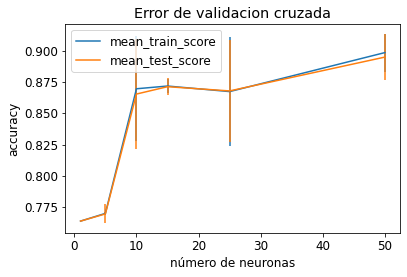

In [172]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada')

In [173]:
# Tasa de aprendizaje
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
        estimator = MLPClassifier(
                        hidden_layer_sizes=(10),
                        solver = 'adam',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=MLPClassifier(alpha=0, hidden_layer_sizes=10,
                                     max_iter=5000, random_state=123),
             param_grid={'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                                100]},
             return_train_score=True, scoring='accuracy')

Text(0.5, 1.0, 'Error de validacion cruzada')

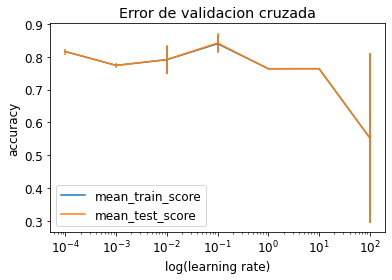

In [174]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada')

In [176]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
import multiprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 3000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X, y)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
32,0.01,"(20, 20)",0.001,0.914375,0.004421,0.915501,0.006051
26,0.001,"(20, 20)",0.001,0.913377,0.008738,0.915625,0.002950
44,0.01,"(20, 20)",0.1,0.909751,0.005748,0.912938,0.004687
0,0.001,"(20, 20)",0.1,0.907125,0.004597,0.913001,0.007019
10,0.1,"(20, 20)",0.1,0.907002,0.013237,0.907500,0.005593
24,0.001,"(10, 10)",0.1,0.906376,0.006996,0.906313,0.002376
2,0.001,"(20, 20)",0.01,0.900128,0.021408,0.903500,0.016958
19,0.1,"(20, 20)",0.001,0.898251,0.007047,0.898813,0.004208
33,0.1,"(20, 20)",1.0,0.897623,0.011787,0.902377,0.018202
42,0.1,"(10, 10)",0.01,0.896502,0.013246,0.896687,0.010930


In [177]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=0.001, hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=3000, solver='lbfgs')

In [178]:
grid_x1 = np.linspace(start=min(dataset['nivel_de_satisfaccion']), stop=max(dataset['nivel_de_satisfaccion']), num=1000)
grid_x2 = np.linspace(start=min(dataset['ultima_evaluacion']), stop=max(dataset['ultima_evaluacion']), num=1000)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
predicciones = modelo.predict(X_grid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [179]:
print(len(predicciones))

1000000


Text(0.5, 1.0, 'Regiones de clasificación')

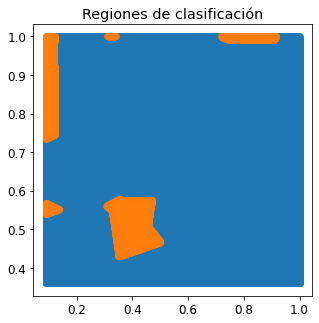

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )

ax.set_title('Regiones de clasificación')
#ax.legend()

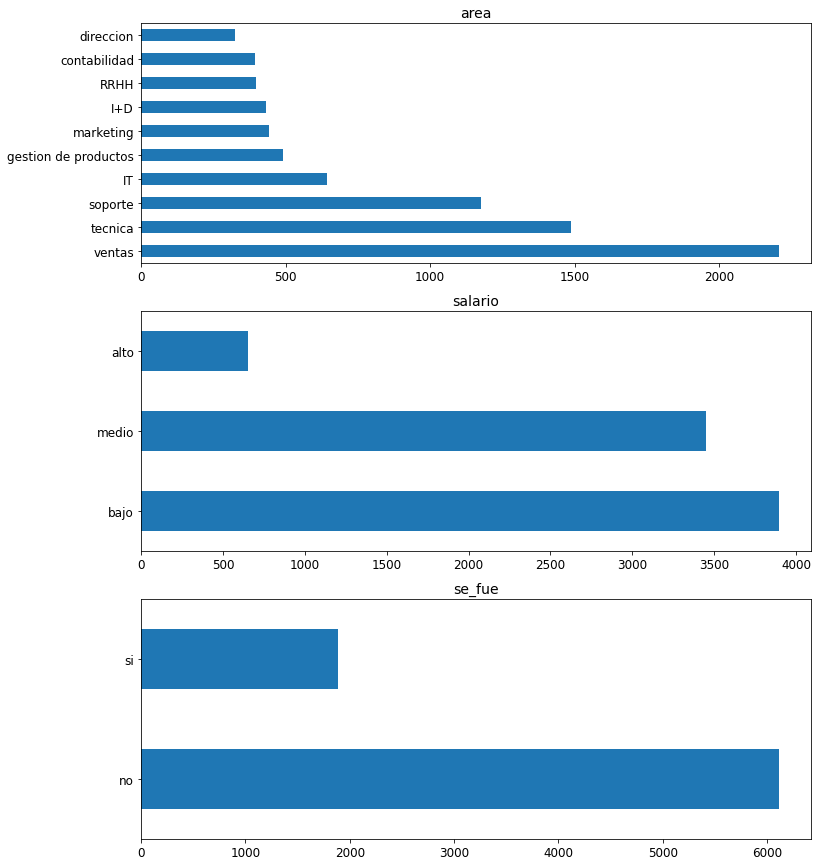

In [181]:
# variables cualitativas
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))
axes = axes.flat
columnas_object = dataset.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    dataset[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")


In [182]:
from google.colab import files 
uploaded = files.upload()

Saving test log Accenture.xlsx to test log Accenture (1).xlsx


In [183]:
column_names_test = ['ID','nivel_de_satisfaccion','ultima_evalucacion','cantidad_proyectos','cantidad_horas_mensuales_trabajadas','años_en_la_empresa', 'tuvo_un_accidente_laboral', 'promociones_ultimos_5_anios', 'area', 'salario', 'se_fue']

raw_dataset_test = pd.read_excel('test log Accenture (1).xlsx')    

datasetTest = raw_dataset_test.copy()
datasetTest

,ID,nivel_de_satisfaccion,ultima_evaluacion,cantidad_proyectos,promedio_horas_mensuales_trabajadas,años_en_la_empresa,tuvo_un_accidente_laboral,promociones_ultimos_5_anios,area,areaNum,salario,se_fue
0,2,0.40,0.57,2,152,3,0,0,ventas,3,bajo,NaN
1,4,0.54,0.52,3,115,3,0,0,contabilidad,5,bajo,NaN
2,9,0.72,0.87,5,223,5,0,0,ventas,3,bajo,NaN
3,14,0.65,0.67,3,245,3,0,0,ventas,3,medio,NaN
4,15,0.54,0.95,4,256,3,0,0,soporte,9,bajo,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9980,0.57,0.85,4,164,3,0,0,ventas,3,bajo,NaN
1996,9987,0.78,0.98,5,239,6,0,0,marketing,7,bajo,NaN
1997,9991,0.09,0.93,6,279,4,0,0,tecnica,2,bajo,NaN
1998,9996,0.88,0.51,4,139,3,0,0,ventas,3,bajo,NaN


In [184]:
datasetTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   2000 non-null   int64  
 1   nivel_de_satisfaccion                2000 non-null   float64
 2   ultima_evaluacion                    2000 non-null   float64
 3   cantidad_proyectos                   2000 non-null   int64  
 4   promedio_horas_mensuales_trabajadas  2000 non-null   int64  
 5   años_en_la_empresa                   2000 non-null   int64  
 6   tuvo_un_accidente_laboral            2000 non-null   int64  
 7   promociones_ultimos_5_anios          2000 non-null   int64  
 8   area                                 2000 non-null   object 
 9   areaNum                              2000 non-null   int64  
 10  salario                              2000 non-null   object 
 11  se_fue                        

In [185]:
datasetTest.isna().sum().sort_values()

ID                                        0
nivel_de_satisfaccion                     0
ultima_evaluacion                         0
cantidad_proyectos                        0
promedio_horas_mensuales_trabajadas       0
años_en_la_empresa                        0
tuvo_un_accidente_laboral                 0
promociones_ultimos_5_anios               0
area                                      0
areaNum                                   0
salario                                   0
se_fue                                 2000
dtype: int64

In [186]:
print(datasetTest.groupby(by ='area').size()) 
print(datasetTest.groupby(by ='areaNum').size())

area
I+D                      99
IT                      166
RRHH                     96
contabilidad            113
direccion                81
gestion de productos    114
marketing               120
soporte                 295
tecnica                 366
ventas                  550
dtype: int64
areaNum
1     114
2     366
3     550
4      81
5     113
6      99
7     120
8      96
9     295
10    166
dtype: int64


In [ ]:
print(dataset.groupby(by ='areaNum').size())
print(dataset.groupby(by ='area').size())
dataset[['areaNum', 'area']].head()
dataset[['areaNum', 'area']]



In [187]:
# comparación entre los logs de train y test, para corroborar homogeneidad de los datos
# =====================================================================================

print("Partición de entrenamento")
print("-----------------------")
display(dataset['se_fue#'].describe())
display(dataset[['nivel_de_satisfaccion', 'ultima_evaluacion']].describe())
display(dataset.describe(include = 'object'))
print(" ")

datasetTest['areaNum'] = datasetTest['areaNum']/10 
print("Partición de test")
print("-----------------------")
#display(datasetTest['se_fue']).describe())
display(datasetTest[['nivel_de_satisfaccion', 'ultima_evaluacion']].describe())
display(datasetTest.describe(include = 'object'))

Partición de entrenamento
-----------------------


count    8000.000000
mean        0.236000
std         0.424649
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: se_fue#, dtype: float64

,nivel_de_satisfaccion,ultima_evaluacion
count,8000.000000,8000.000000
mean,0.611250,0.717285
std,0.248972,0.171529
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.720000
75%,0.820000,0.870000
max,1.000000,1.000000


,area,salario,se_fue
count,8000,8000,8000
unique,10,3,2
top,ventas,bajo,no
freq,2207,3894,6112


 
Partición de test
-----------------------


,nivel_de_satisfaccion,ultima_evaluacion
count,2000.000000,2000.000000
mean,0.615590,0.713970
std,0.249126,0.171908
min,0.090000,0.360000
25%,0.440000,0.560000
50%,0.640000,0.715000
75%,0.820000,0.870000
max,1.000000,1.000000


,area,salario
count,2000,2000
unique,10,3
top,ventas,bajo
freq,550,969


In [188]:
grid_x1 = np.linspace(start=min(datasetTest['nivel_de_satisfaccion']), stop=max(datasetTest['nivel_de_satisfaccion']), num=1000)
grid_x2 = np.linspace(start=min(datasetTest['ultima_evaluacion']), stop=max(datasetTest['ultima_evaluacion']), num=1000)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
predicciones = modelo.predict(X_grid)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [189]:
print(len(predicciones))

1000000


Text(0.5, 1.0, 'Regiones de clasificación')

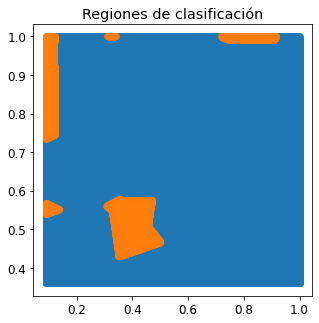

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )

ax.set_title('Regiones de clasificación')
#ax.legend()

In [329]:
import warnings
warnings.filterwarnings('ignore')

listaPredicciones = []

datasetTest = pd.DataFrame(datasetTest)
dato = datasetTest.loc[0, ['nivel_de_satisfaccion', 'ultima_evaluacion']]
values = dataset.loc[:, ['nivel_de_satisfaccion', 'ultima_evaluacion']].values

#print(dato)
#print('\n')
#print(values)
#print('\n')

for i in range(0,len(datasetTest)):
  
  x1 = datasetTest['nivel_de_satisfaccion'].iloc[i-1]
  x2 = datasetTest['nivel_de_satisfaccion'].iloc[i]
  y1 = datasetTest['ultima_evaluacion'].iloc[i-1]
  y2 = datasetTest['ultima_evaluacion'].iloc[i]

  xy = np.array([[x1,y1], [0,0]])
  prediccion = modelo.predict(xy)
  #print(xy)
  listaPredicciones.append(prediccion)


listaPredicciones = pd.DataFrame(listaPredicciones)

print('\n')
print(pd.DataFrame(listaPredicciones))
print('\n')
print(pd.DataFrame(listaPredicciones).info())
print('\n')
print(pd.DataFrame(listaPredicciones).describe())



      0  1
0     0  0
1     1  0
2     0  0
3     0  0
4     0  0
...  .. ..
1995  0  0
1996  0  0
1997  0  0
1998  1  0
1999  0  0

[2000 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2000 non-null   int64
 1   1       2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB
None


                 0       1
count  2000.000000  2000.0
mean      0.172500     0.0
std       0.377909     0.0
min       0.000000     0.0
25%       0.000000     0.0
50%       0.000000     0.0
75%       0.000000     0.0
max       1.000000     0.0


In [308]:
dataset['se_fue#'].describe()

count    8000.000000
mean        0.236000
std         0.424649
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: se_fue#, dtype: float64

In [328]:
listaPredicciones.to_csv('Predicciones_de_Renuncia.csv')
